In [ ]:
import numpy as np

class LogReg:
    def __init__(self, lr=.001, epochs=1000, reg_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.reg_lambda = reg_lambda
        self.weights = None
        self.bias = None
        self.losses = []

    @staticmethod
    def sigmoid(z):
        # clip values to avoid numerical overflow
        z = np.clip(z, -500, 500)
        return 1.0 / (1.0 + np.exp(-z))

    def fit(self, X, y, debug=False):
        # get number of samples (m) and features (n)
        m, n = X.shape
        y = y.reshape(m, 1)

        # initialize parameters
        self.weights = np.zeros((n, 1))
        self.bias = 0.0
        self.losses = []

        eps = 1e-12
        for epoch in range(self.epochs):
            # forward pass
            z = np.dot(X, self.weights) + self.bias          # (m, 1)
            y_hat = self.sigmoid(z)                          # (m, 1)

            # binary cross-entropy (bce) loss + optional l2 regularization
            y_hat_clip = np.clip(y_hat, eps, 1 - eps)
            bce = -np.mean(y * np.log(y_hat_clip) + (1 - y) * np.log(1 - y_hat_clip))
            l2 = (self.reg_lambda / (2 * m)) * np.sum(self.weights ** 2)
            loss = bce + l2
            self.losses.append(loss)

            # compute gradients
            err = (y_hat - y)                                 # (m, 1)
            dw = (np.dot(X.T, err) / m) + (self.reg_lambda / m) * self.weights
            db = np.sum(err) / m

            # update parameters
            self.weights -= self.lr * dw
            self.bias    -= self.lr * db

            # optional debug print
            if debug and (epoch % max(1, self.epochs // 10) == 0):
                print(f"epoch {epoch} | loss={loss:.6f}")

    def predict_proba(self, X):
        # check if model was trained
        if self.weights is None:
            raise Exception("model has not been trained yet. call fit() first.")
        # reshape if single sample
        if X.ndim == 1:
            X = X.reshape(1, -1)
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z).reshape(-1)

    def predict(self, X, threshold=0.5):
        # return binary labels using a threshold (default 0.5)
        proba = self.predict_proba(X)
        return (proba >= threshold).astype(int)


log loss: 0.4107403133468797
accuracy: 0.7666666666666667


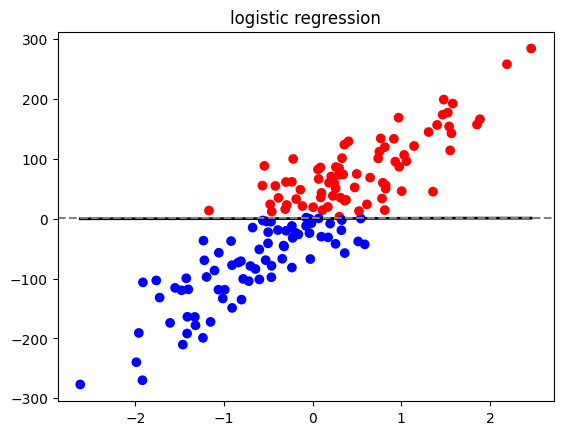

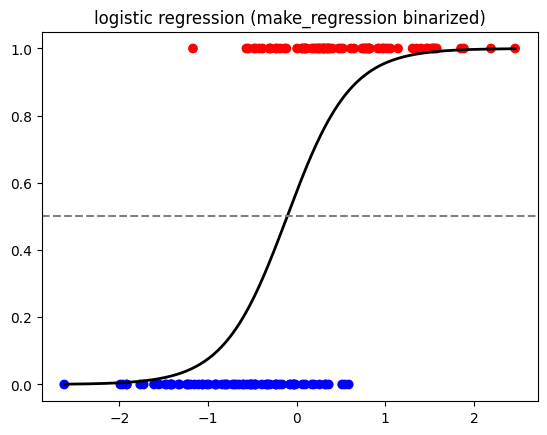

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score

# generate synthetic dataset
X, y_cont = make_regression(n_samples=150, n_features=1, random_state=42, noise=50)

# binarize target: 1 if y_cont >= median, 0 otherwise
y = (y_cont >= np.median(y_cont)).astype(int)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train model
model = LogReg(lr=0.1, epochs=2000)
model.fit(X_train, y_train)

# predict
y_prob = model.predict_proba(X_test)
y_hat = (y_prob >= 0.5).astype(int)

# metrics
print("log loss:", log_loss(y_test, y_prob))
print("accuracy:", accuracy_score(y_test, y_hat))

# plot
X_line = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_line = model.predict_proba(X_line)

plt.scatter(X, y_cont, c=y, cmap='bwr')
plt.plot(X_line, y_line, 'k', linewidth=2)
plt.axhline(0.5, ls='--', c='gray')
plt.title('logistic regression')
plt.show()

plt.scatter(X, y, c=y, cmap='bwr')
plt.plot(X_line, y_line, 'k', linewidth=2)
plt.axhline(0.5, ls='--', c='gray')
plt.title('logistic regression (binarized)')
plt.show()
